<a href="https://colab.research.google.com/github/ainunharr/pythontask/blob/main/Tugas12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

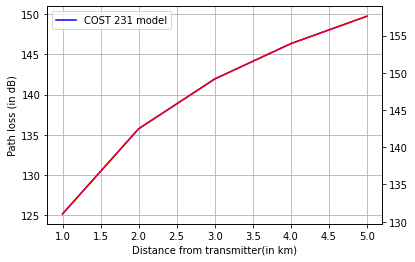

L50 values by Cost 231 model
131.04  142.48  149.17  153.92  157.60 
 


In [15]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Variable declaration
d=np.array([1, 2, 3, 4, 5]);  #in km
hb=30; #Height of BS antenna in metres
hm=2;# height of mobile antenna in matres
fc=900;#carrier frequency in MHz
W=15;  #street width(m)
b=30;  # distance between building along radio path (m) 
phi=90; # incident angle relative to the street
hr=30; #in m

#Calculations
dellhm=hr-hm;
#L50=Lf+Lrts+Lms

# By COST 231 model
Lf=32.4+20*np.log10(d)+20*np.log10(fc);
L0=4-0.114*(phi-55);
Lrts=-16.9-10*math.log10(W)+10*math.log10(fc)+20*math.log10(dellhm)+L0;
Lbsh=-18*math.log10(11);
ka=54-0.8*hb;
dellhb=hb-hr;
kd=18-15*dellhb/dellhm;
kf=4+0.7*(fc/925-1);
Lms=Lbsh+ka+kd*np.log10(d)+kf*np.log10(fc)-9*np.log10(b);
L50=np.array([0, 0, 0, 0, 0])
L50=Lf+Lrts+Lms;


#Results
fig,ax1 = plt.subplots()
ax1.plot(d,L_50,'b-')
ax1.set_xlabel('Distance from transmitter(in km)')
ax1.set_ylabel('Path loss (in dB)')
ax2 = ax1.twinx()
ax2.plot(d,L50,'r')
ax1.legend(['COST 231 model'],loc=0)
ax1.grid()
plt.show()
print ("L50 values by Cost 231 model")
print ('%.2f  %.2f  %.2f  %.2f  %.2f \n '%(L50[0],L50[1],L50[2],L50[3],L50[4]));



In [24]:
import math

#Variable declaration
SNRmin=12;#in dB
n=3; #No of floors
Backgroundnoise=-115; #dBm
pt=100  #in dBm

#Calculations
pt_db=10*math.log10(pt);
Sr=Backgroundnoise+SNRmin; #receiver sensitivity
Lpmax=pt_db-Sr;
#Refering table 3.4
Lp_d0=38;  #ref path loss at the first meter(dB)
Lf=15+4*(n-1); #signal attenuation through n floors
y=3; #path loss exponent
X=10; #Shadowing effect(dB)
d=10**((Lpmax-Lp_d0-Lf-X)/30); #max allowable path loss

#Result
print ('Coverage radius of an access point = %d m \n'%(round(d)))

Coverage radius of an access point = 54 m 



In [26]:
import math

#Variable declaration
SSmean=-100; #signal strength(dBm)
Sr=-110; #receiver sensitivity(dBm)
sd=10;  #standard deviation(dB)

#Calculations
P_Smin=(0.5-0.5*math.erf((Sr-SSmean)/(math.sqrt(2)*sd)));

#Result
print ('probability of exceeding signal beyond the receiver sensitivity is %.2f \n'%(P_Smin))

probability of exceeding signal beyond the receiver sensitivity is 0.84 



In [31]:
import math

#Variable declaration
Lp=140; # path losses in dB 
k=1.38*10**-23; # Boltzmann’s constant (W/Kelvin-Hz)
k_db=10*math.log10(k);
f=900;#in MHz
Gt=8; #transmitting antenna gain(dB)
Gr=0; #receiver antenna gain(dB)
Ag=24;#gain of receiver ampliﬁer in dB 
Fmargin=8;#Fade margin(dB)
Nf=6;#Noise figure(dB)
L0=20; # other losses in dB
Lf=12; # antenna feed line loss in dB 
T=24.6;#Temperature expressed in dB
R=39.8; # data rate in dB 
M=8;  #overall link margin(dB)
Eb_No=10;#dB

#Calculations
#From equation  (3.54)
pt_db=M-Gt-Gr-Ag+ Nf + T+ k_db+ Lp+ Lf+ L0 + Fmargin+ R+ Eb_No;

#Result
print ('Total transmitted power is %d dB \n'%pt_db)

Total transmitted power is 7 dB 

